In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from src.utils.utils import *

In [81]:
df = pd.read_csv('data/bike_sharing_.csv')

In [82]:
df.shape

(54833, 13)

In [83]:
df.duplicated().sum()

0

In [84]:
#NA values 
df.isna().sum()

ride_id                 0
rideable_type           0
started_at              0
ended_at                0
start_station_name      0
start_station_id        0
end_station_name      124
end_station_id        166
start_lat               0
start_lng               0
end_lat                16
end_lng                16
member_casual           0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54833 entries, 0 to 54832
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             54833 non-null  object 
 1   rideable_type       54833 non-null  object 
 2   started_at          54833 non-null  object 
 3   ended_at            54833 non-null  object 
 4   start_station_name  54833 non-null  object 
 5   start_station_id    54833 non-null  object 
 6   end_station_name    54709 non-null  object 
 7   end_station_id      54667 non-null  object 
 8   start_lat           54833 non-null  float64
 9   start_lng           54833 non-null  float64
 10  end_lat             54817 non-null  float64
 11  end_lng             54817 non-null  float64
 12  member_casual       54833 non-null  object 
dtypes: float64(4), object(9)
memory usage: 5.4+ MB


In [86]:
#converting started_at and ended_at into datetime dtype

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [87]:
#calculating the trip timing 

df['t_duration_']  = df['ended_at'] - df['started_at'] 
df['t_duration_'].head()

0   0 days 00:03:30.642000
1   0 days 00:11:01.073000
2   0 days 00:06:57.137000
3   0 days 00:06:09.801000
4   0 days 00:08:47.519000
Name: t_duration_, dtype: timedelta64[ns]

In [88]:
#converting to minute
df['t_duration_'] = df['t_duration_'].dt.total_seconds() / 60
df['t_duration_'].head()

0     3.510700
1    11.017883
2     6.952283
3     6.163350
4     8.791983
Name: t_duration_, dtype: float64

#### **analysis**

Here, trying to find some insights so we are going to answer some primary quetion:

- The top 5 station bike demand
- 3 lower station bike demand 
- distribution member_casual && bike_type !!
- day on week, which we have higher demand 
- bike demand through morining, night period 
- additional features !!!

In [89]:
df['start_station_id'].value_counts()

start_station_id
HB102    3296
JC115    2678
HB101    1424
JC109    1362
HB105    1359
         ... 
JC018     150
JC063      87
JC108      76
JC051      72
JC107      28
Name: count, Length: 83, dtype: int64

In [90]:
top_5_station = df['start_station_id'].value_counts() / df.shape[0]
top_5_station.head()

start_station_id
HB102    0.060110
JC115    0.048839
HB101    0.025970
JC109    0.024839
HB105    0.024784
Name: count, dtype: float64

#### **Highest vs Lowest demand (active) bike by station**

<Axes: xlabel='start_station_id', ylabel='Count'>

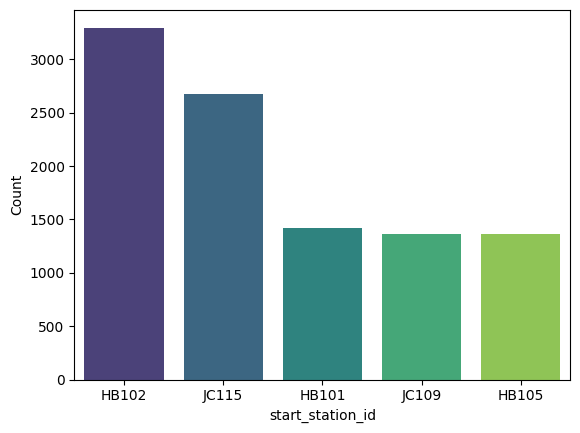

In [91]:
#top 5 
handle_categorical_data(df, 'start_station_id',n=5)

<Axes: xlabel='start_station_id', ylabel='Count'>

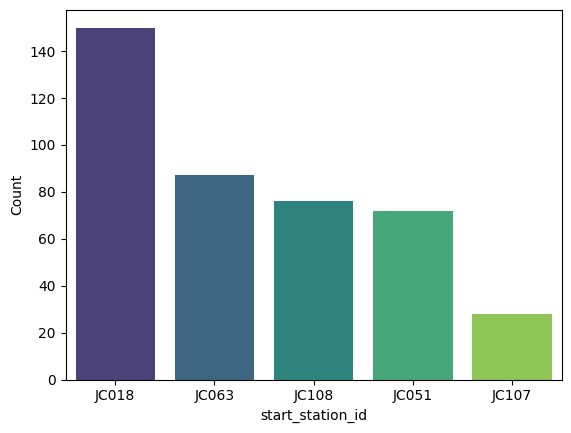

In [92]:
handle_categorical_data(df, 'start_station_id',n=-5)

#### **Rider type distribution**

<Axes: xlabel='member_casual', ylabel='Count'>

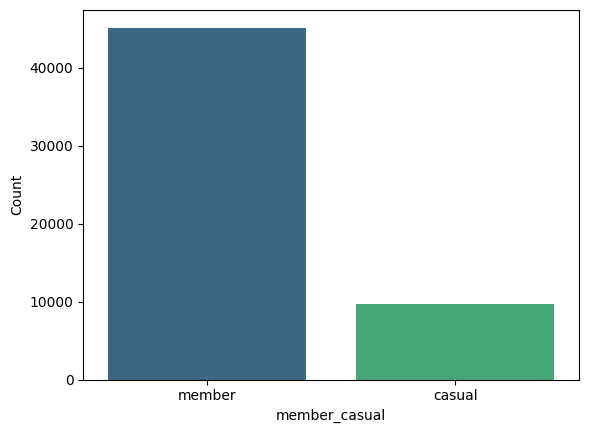

In [93]:
#casual_member
handle_categorical_data(df, 'member_casual')

In [94]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 't_duration_'],
      dtype='object')

#### **Bike Distribution**

<Axes: xlabel='rideable_type', ylabel='Count'>

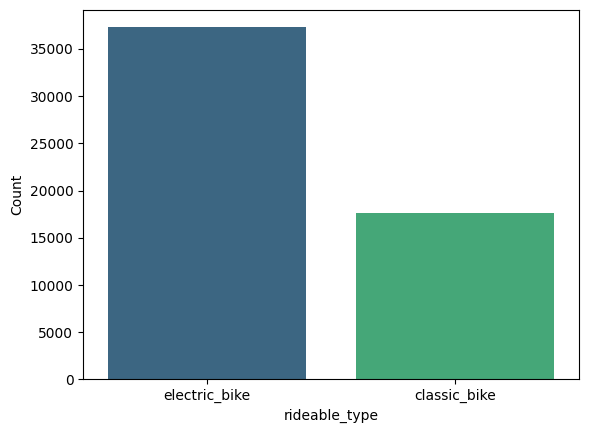

In [95]:
handle_categorical_data(df, 'rideable_type')

##### **Most used destination A to B**

- Here we can make conclusion about the importance about station position

In [96]:
#most used destination (freq)
dest_freq = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='ab_freq_').sort_values(by='ab_freq_', ascending=False)
dest_freq.head(7)

start_station_name  \
3258                           McGinley Square   
2034                             Grove St PATH   
2028                             Grove St PATH   
2844                        Liberty Light Rail   
2407  Hoboken Terminal - Hudson St & Hudson Pl   
492                       8 St & Washington St   
838                       Bergen Ave & Sip Ave   

                             end_station_name  ab_freq_  
3258                     Bergen Ave & Sip Ave       317  
2034                         Marin Light Rail       296  
2028                       Liberty Light Rail       285  
2844                            Grove St PATH       274  
2407               Hoboken Ave at Monmouth St       269  
492   Hoboken Terminal - River St & Hudson Pl       268  
838                           McGinley Square       257

In [97]:
dest_freq.tail(10)

start_station_name            end_station_name  ab_freq_
1916                          Grand St        York St & Marin Blvd         1
1917                  Grand St & 14 St            11 Ave & W 27 St         1
1246  City Hall - Washington St & 1 St               Fairmount Ave         1
1925                  Grand St & 14 St  7 Ave & Central Park South         1
1245  City Hall - Washington St & 1 St                 Exchange Pl         1
3514                        Newark Ave          Marshall St & 2 St         1
501               8 St & Washington St                Morris Canal         1
1242  City Hall - Washington St & 1 St              Columbus Drive         1
1041                      Brunswick St             River St & 1 St         1
2969                 Madison St & 1 St                    Union St         1

In [98]:
df['time_of_day_'] = df['started_at'].apply(categorize_time_of_day)

In [99]:
df[['started_at','time_of_day_']].head()

started_at time_of_day_
0 2024-12-06 17:50:49.428      Evening
1 2024-12-14 11:01:00.309      Morning
2 2024-12-24 08:07:17.475      Morning
3 2024-12-19 12:48:05.452    Afternoon
4 2024-12-17 11:19:37.631      Morning

In [100]:
time_of_day_ = df['time_of_day_'].value_counts()
time_of_day_

time_of_day_
Morning      17185
Afternoon    16907
Evening      13105
Night         7636
Name: count, dtype: int64

<Axes: xlabel='time_of_day_', ylabel='Count'>

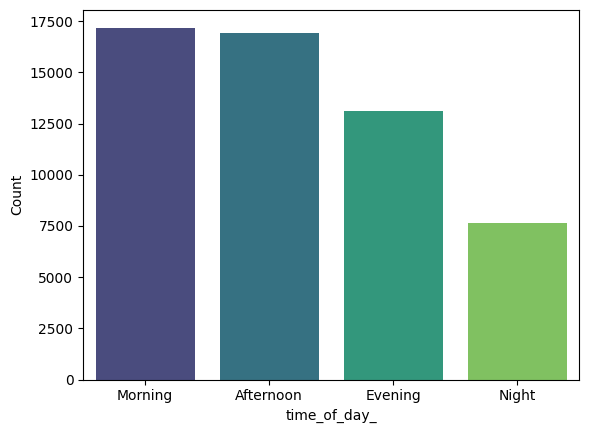

In [101]:
handle_categorical_data(df,'time_of_day_')

In [102]:
df.groupby('time_of_day_')[['time_of_day_', 'member_casual']].value_counts()

time_of_day_  member_casual
Afternoon     member           13714
              casual            3193
Evening       member           10919
              casual            2186
Morning       member           14763
              casual            2422
Night         member            5788
              casual            1848
Name: count, dtype: int64

In [103]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 't_duration_', 'time_of_day_'],
      dtype='object')

In [104]:
df.groupby('time_of_day_')[['time_of_day_', 'rideable_type']].value_counts()

time_of_day_  rideable_type
Afternoon     electric_bike    11486
              classic_bike      5421
Evening       electric_bike     9267
              classic_bike      3838
Morning       electric_bike    11359
              classic_bike      5826
Night         electric_bike     5153
              classic_bike      2483
Name: count, dtype: int64

<Axes: xlabel='rideable_type', ylabel='t_duration_'>

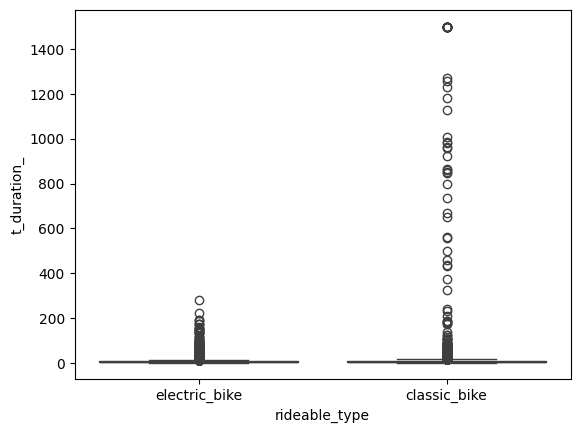

In [105]:
sns.boxplot(df, y='t_duration_',x='rideable_type')

#### **Spatio temporal analysis**

- spatial analysis (by station)
- temporal analysis 

In [106]:
#here we've create the ride numbers columns at each station every 1h

df['started_at_hour'] = df['started_at'].dt.floor('H')
demand_df = df.groupby(
    ['start_station_id', 'started_at_hour']
).size().reset_index(name='rides_')
df = df.merge(demand_df, on=['start_station_id', 'started_at_hour'], how='left')

In [107]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 't_duration_', 'time_of_day_', 'started_at_hour',
       'rides_'],
      dtype='object')

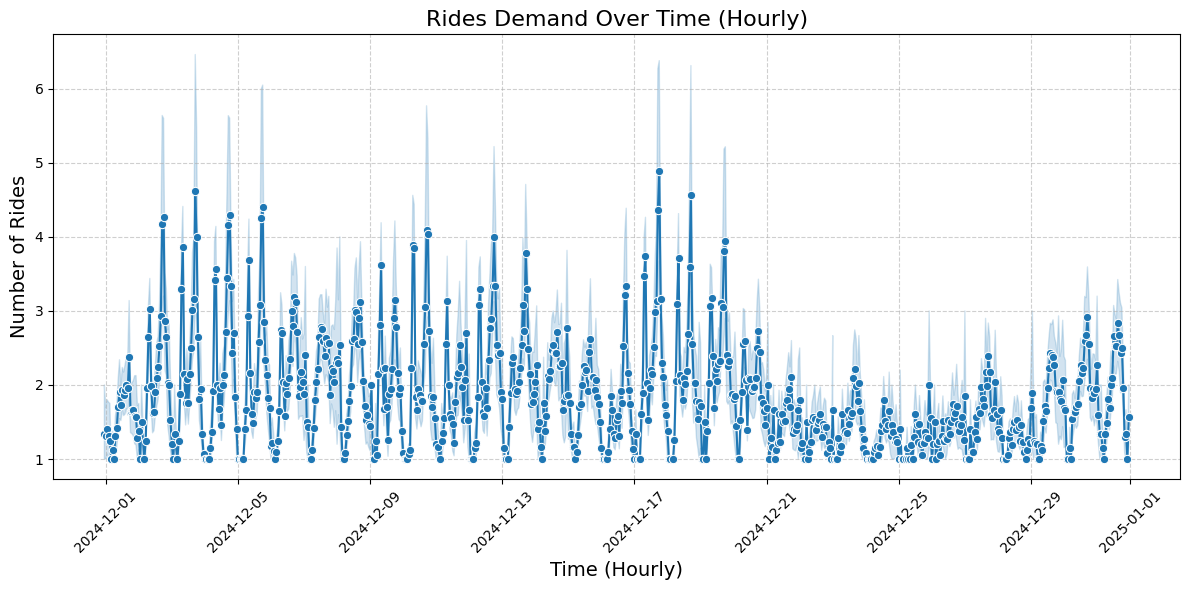

In [108]:


plt.figure(figsize=(12, 6))
sns.lineplot(data=demand_df, x='started_at_hour', y='rides_', marker='o')
plt.title('Rides Demand Over Time (Hourly)', fontsize=16)
plt.xlabel('Time (Hourly)', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [119]:
filtered_df = df[df['started_at'] > '2024-12-21']

# Show the filtered DataFrame
print(filtered_df['rideable_type'].value_counts())

rideable_type
electric_bike    7939
classic_bike     3617
Name: count, dtype: int64


In [120]:
print(filtered_df['member_casual'].value_counts())

member_casual
member    9201
casual    2355
Name: count, dtype: int64


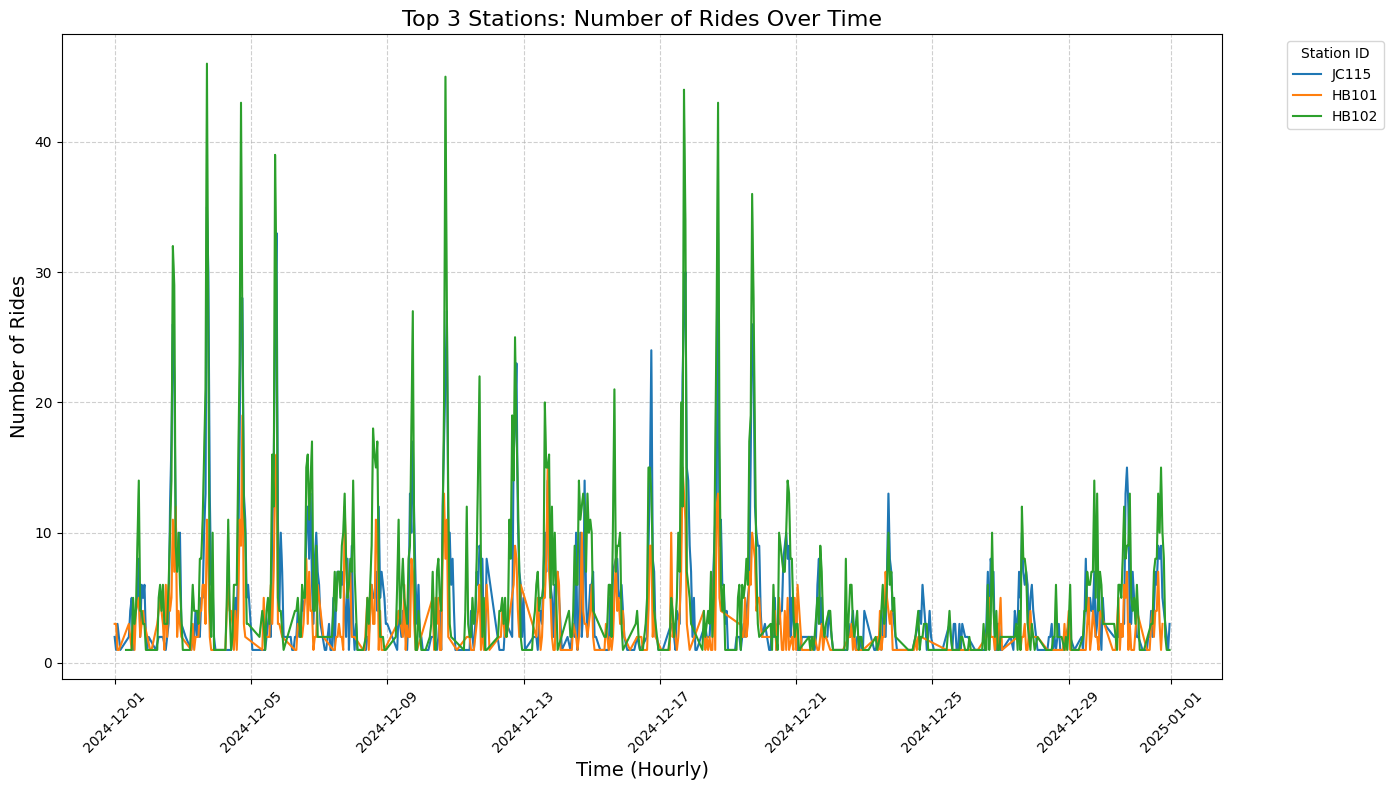

In [110]:
plot_station_trends(df, n=3, markers=None)

In [111]:
df[['started_at','start_station_name', 'rides_']].sort_values(by='started_at', ascending=False)

started_at    start_station_name  rides_
5144  2024-12-31 23:54:10.246  Bergen Ave & Sip Ave       1
23048 2024-12-31 23:51:39.161     Clinton St & 7 St       1
7284  2024-12-31 23:50:13.243          Brunswick St       2
11380 2024-12-31 23:50:07.562          Brunswick St       2
54516 2024-12-31 23:41:34.230           Dixon Mills       1
...                       ...                   ...     ...
50119 2024-12-01 00:08:12.353         Grove St PATH       2
8995  2024-11-30 23:58:46.504       River St & 1 St       2
24123 2024-11-30 23:58:07.259  Bergen Ave & Sip Ave       1
9645  2024-11-30 23:54:04.805       River St & 1 St       2
53094 2024-11-30 23:32:54.155       4 St & River St       1

[54833 rows x 3 columns]

In [114]:
import pandas as pd
import plotly.express as px

# Sample DataFrame
# Replace this with your actual dataset
data = df.copy()
# Create a map plot with Plotly
fig = px.scatter_mapbox(
    data,
    lat='start_lat',
    lon='start_lng',
    size='rides_',  # Marker size based on rides_
    color='rides_',  # Marker color based on rides_
    text='start_station_name',  # Display station names on hover
    title="Rides per Station",
    mapbox_style="carto-positron",  # Choose a map style
    zoom=12,  # Adjust zoom level
    height=600
)

# Show the plot
fig.show()


In [115]:
df.to_csv('data/bike_sharing_.csv', index=False)